In [9]:
import pandas as pd
from datetime import datetime

In [10]:
df = pd.read_csv('datasets/us_accidents_expanded.csv')

## Numerical Analysis

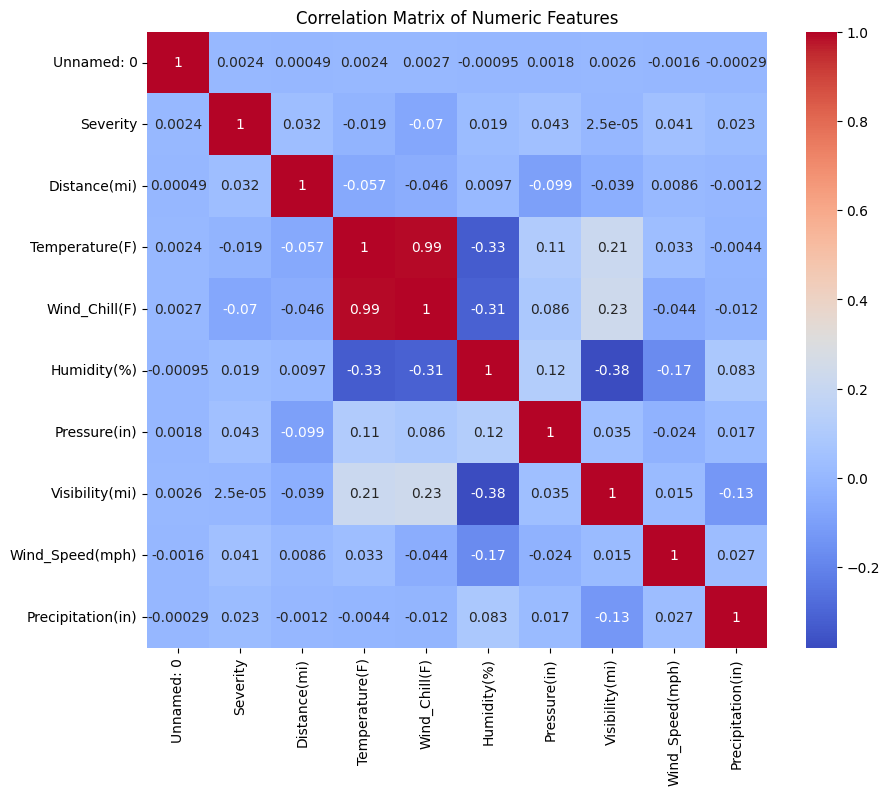

In [11]:
# Select only numeric columns for correlation
unfiltered_numeric_df = df.select_dtypes(include=[float, int])
numeric_df = unfiltered_numeric_df.drop(['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], axis=1) #removing unwanted numerical features


corr_matrix = numeric_df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [12]:
unfiltered_numeric_df 

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0,2,30.641211,-91.153481,NaN,NaN,0.000,77.0,77.0,62.0,29.92,10.0,5.0,0.00
1,1,2,38.990562,-77.399070,38.990037,-77.398282,0.056,45.0,43.0,48.0,29.91,10.0,5.0,0.00
2,2,2,34.661189,-120.492822,34.661189,-120.492442,0.022,68.0,68.0,73.0,29.79,10.0,13.0,0.00
3,3,2,43.680592,-92.993317,43.680574,-92.972223,1.054,27.0,15.0,86.0,28.49,10.0,15.0,0.00
4,4,2,35.395484,-118.985176,35.395476,-118.985995,0.046,42.0,42.0,34.0,29.77,10.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,2,45.522510,-123.084104,45.520225,-123.084211,0.158,40.0,32.0,77.0,29.55,10.0,15.0,0.01
499996,499996,2,26.702570,-80.111169,26.703141,-80.111133,0.040,78.0,78.0,87.0,29.94,10.0,13.0,0.01
499997,499997,2,34.561862,-112.259620,34.566822,-112.267150,0.549,52.0,52.0,12.0,24.94,10.0,12.0,0.00
499998,499998,3,38.406680,-78.619310,38.406680,-78.619310,0.000,82.0,82.0,38.0,28.70,10.0,14.0,0.00


In [13]:
def calculate_elapsed_time(start_times, end_times, time_format='%Y-%m-%d %H:%M:%S'):
    elapsed_times = []
    for start, end in zip(start_times, end_times):
        try:
            start_dt = datetime.strptime(start, time_format)
            end_dt = datetime.strptime(end, time_format)
            elapsed_time = (end_dt - start_dt).total_seconds() / 60  # Convert to minutes
            elapsed_times.append(elapsed_time)
        except Exception as e:
            elapsed_times.append(None) 
    return pd.Series(elapsed_times)


if 'Start_Datetime' in df.columns and 'End_Datetime' in df.columns:
    df['Elapsed_Time'] = calculate_elapsed_time(df['Start_Datetime'], df['End_Datetime'])
else:
    print("Error: 'Start_Datetime' or 'End_Datetime' column is missing in the DataFrame.")


In [14]:
print(df[['Start_Datetime', 'End_Datetime', 'Elapsed_Time']].head())

        Start_Datetime         End_Datetime  Elapsed_Time
0  2019-06-12 10:10:56  2019-06-12 10:55:58     45.033333
1  2022-12-03 23:37:14  2022-12-04 01:56:53    139.650000
2  2022-08-20 13:13:00  2022-08-20 15:22:45    129.750000
3  2022-02-21 17:43:04  2022-02-21 19:43:23    120.316667
4  2020-12-04 01:46:00  2020-12-04 04:13:09    147.150000
